In [1]:
import pandas as pd

from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
genus_list = [
    "Bifidobacterium",
    "Blautia",
    "f_Lachnospiraceae",
    "Monoglobus",
    "Hungatella",
    "Flavonifractor",
    "Lachnoclostridium",
    "Parabacteroides",
]

In [5]:
x_features = genus_list
y_features = ['AA', 'PA', 'BA',]

In [6]:
df_key = pd.read_excel('./data/SCFA_250501.xlsx', sheet_name='key_dataset')


corr_matrix = pd.DataFrame(index=x_features, columns=y_features)
pval_matrix = pd.DataFrame(index=x_features, columns=y_features)


In [7]:
for x in x_features:
    for y in y_features:
        corr, pval = spearmanr(df_key[x], df_key[y])
        corr_matrix.loc[x, y] = corr
        pval_matrix.loc[x, y] = pval

# Convert to float
corr_matrix = corr_matrix.astype(float)
pval_matrix = pval_matrix.astype(float)


In [8]:
corr_matrix

,AA,PA,BA
Bifidobacterium,0.558720,0.590230,0.364283
Blautia,0.420023,0.511856,0.408732
f_Lachnospiraceae,0.442272,0.430989,0.447537
Monoglobus,0.230941,0.287827,0.421128
Hungatella,-0.333903,-0.422017,-0.354309
Flavonifractor,-0.357859,-0.419272,-0.232002
Lachnoclostridium,-0.356071,-0.368192,-0.463650
Parabacteroides,-0.586908,-0.633559,-0.570354


In [9]:
pval_matrix

,AA,PA,BA
Bifidobacterium,0.010446,0.006151,0.114326
Blautia,0.065213,0.021050,0.073565
f_Lachnospiraceae,0.050867,0.057804,0.047857
Monoglobus,0.327271,0.218485,0.064436
Hungatella,0.150210,0.063815,0.125347
Flavonifractor,0.121341,0.065745,0.324991
Lachnoclostridium,0.123347,0.110202,0.039488
Parabacteroides,0.006520,0.002707,0.008642


In [10]:
significant_mask = pval_matrix < 0.05
significant_corrs = corr_matrix.where(significant_mask).dropna(how='all').dropna(axis=1, how='all')

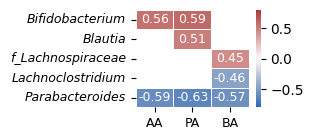

In [11]:
plt.figure(figsize=(3.1, 1.5))

# Draw the heatmap for significant correlations
sns.heatmap(significant_corrs, annot=True, cmap='vlag', center=0, fmt=".2f",
             linewidths=0.5, annot_kws = {'size' : 9}, vmax=0.8, vmin=-0.8)

# plt.title("Significant Spearman Correlation Heatmap (FDR < 0.05)")
plt.xticks(rotation=0, ha='center', fontsize=9)
plt.yticks(rotation=0, fontsize=9, fontstyle='italic')
plt.tight_layout()
# plt.savefig('spearman_hydrolysis.png', dpi=600)
plt.show()

In [26]:
# The SCFA intensities were normalized by setting the mean value of the control group to 1, allowing for relative comparison across groups.

df = pd.read_excel('./data/SCFA_250501.xlsx', sheet_name='key_dataset_rel')


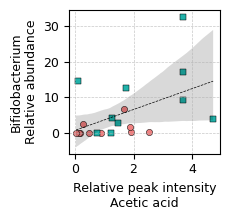

In [27]:
# 지정한 색상 순서로 마커 스타일과 함께 그룹 시각화
g_colors = ['lightcoral','lightseagreen',]
group_order = ["Control", "Chickpea"]
marker_dict = {
    "Control": "o",
    "Chickpea": "s",
}

plt.figure(figsize=(2.4, 2.3))
for group, color in zip(group_order, g_colors):
    subset = df[df["class"] == group]
    sns.scatterplot(
        data=subset,
        x="AA",
        y="Bifidobacterium",
        label=group,
        color=color,
        marker=marker_dict[group],
        s=20,
        edgecolor="black"
    )

sns.regplot(
data=df,
x="AA",
y="Bifidobacterium",
scatter=False,
color="black",
line_kws={"linewidth": 0.5, "label": "Overall trend", "linestyle": "--"}
)

# plt.title("Bifidobacterium vs Acetic acid by Group")
plt.xlabel("Relative peak intensity\nAcetic acid", fontsize=9)
plt.ylabel("Bifidobacterium\nRelative abundance",  fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.legend(title="Group", fontsize=9).remove()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # grid 추가


plt.tight_layout()
plt.savefig('corrleation_B_A.png', dpi=600)

plt.show()


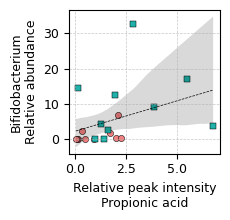

In [28]:
# 지정한 색상 순서로 마커 스타일과 함께 그룹 시각화
g_colors = ['lightcoral','lightseagreen',]
group_order = ["Control", "Chickpea"]
marker_dict = {
    "Control": "o",
    "Chickpea": "s",
}

plt.figure(figsize=(2.4, 2.3))
for group, color in zip(group_order, g_colors):
    subset = df[df["class"] == group]
    sns.scatterplot(
        data=subset,
        x="PA",
        y="Bifidobacterium",
        label=group,
        color=color,
        marker=marker_dict[group],
        s=20,
        edgecolor="black"
    )

sns.regplot(
data=df,
x="PA",
y="Bifidobacterium",
scatter=False,
color="black",
line_kws={"linewidth": 0.5, "label": "Overall trend", "linestyle": "--"}
)

# plt.title("Bifidobacterium vs Acetic acid by Group")
plt.xlabel("Relative peak intensity\nPropionic acid", fontsize=9)
plt.ylabel("Bifidobacterium\nRelative abundance",  fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.legend(title="Group", fontsize=9).remove()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # grid 추가


plt.tight_layout()
plt.savefig('corrleation_B_P.png', dpi=600)

plt.show()


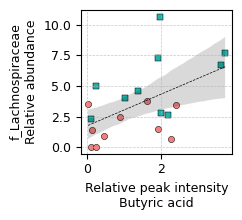

In [29]:
# 지정한 색상 순서로 마커 스타일과 함께 그룹 시각화
g_colors = ['lightcoral','lightseagreen',]
group_order = ["Control", "Chickpea"]
marker_dict = {
    "Control": "o",
    "Chickpea": "s",
}

plt.figure(figsize=(2.4, 2.3))
for group, color in zip(group_order, g_colors):
    subset = df[df["class"] == group]
    sns.scatterplot(
        data=subset,
        x="BA",
        y="f_Lachnospiraceae",
        label=group,
        color=color,
        marker=marker_dict[group],
        s=20,
        edgecolor="black"
    )

sns.regplot(
data=df,
x="BA",
y="f_Lachnospiraceae",
scatter=False,
color="black",
line_kws={"linewidth": 0.5, "label": "Overall trend", "linestyle": "--"}
)

# plt.title("Bifidobacterium vs Acetic acid by Group")
plt.xlabel("Relative peak intensity\nButyric acid", fontsize=9)
plt.ylabel("f_Lachnospiraceae\nRelative abundance",  fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.legend(title="Group", fontsize=9).remove()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # grid 추가


plt.tight_layout()
plt.savefig('corrleation_L_B.png', dpi=600)

plt.show()
